In [48]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neighbors import NearestNeighbors
import cv2

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.
/Users/Max/opt/anaconda3/envs/D7041E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Max/opt/anaconda3/envs/D7041E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Max/opt/anaconda3/envs/D7041E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Max/opt

In [102]:
#Function to plot any number in the training data
def plotImg(index, images):
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,20))
    ax0=plt.subplot(2,2,1)
    ax1=plt.subplot(2,2,2)
    
    ax0.imshow(images[index])
    #one_color = np.take(images[index],axis=2)
    
    red = images[index][:,:,0]
    green = images[index][:,:,1]
    blue = images[index][:,:,2]
    print(red.shape)
    
    plt.hist(red, 10, alpha=0.5, label='red')
    plt.hist(green, 10, alpha=0.5, label='green')
    plt.hist(blue, 10, alpha=0.5, label='blue')

    plt.show()

    #ax1.imshow(cv2.calcHist([images[index]],[2],None,[256],[0,256]))
    #n, bins, patches = plt.hist(images[index][0], 10,histtype='stepfilled', facecolor='blue', alpha=0.5)
    
    #std = np.std(list)
    #minimum = min(list)
    #maximum = max(list)
    #avg = sum(list)/len(list)

    
    #print("Standard deviation is: ", std)
    #print("Minimum is: ", minimum)
    #print("Maximum is: ", maximum)
    #print("Average is: ", avg)




In [ ]:
images = []
for i in range(5):
    image = cv2.imread('./woods.jpg')
    images.append(image)
    
plotImg(0,images)


(1365, 1820)


KeyboardInterrupt: 

In [4]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [53]:

Xtr.shape


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

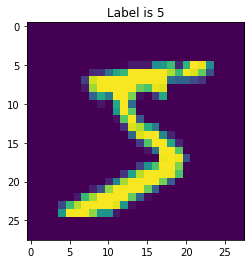

In [9]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


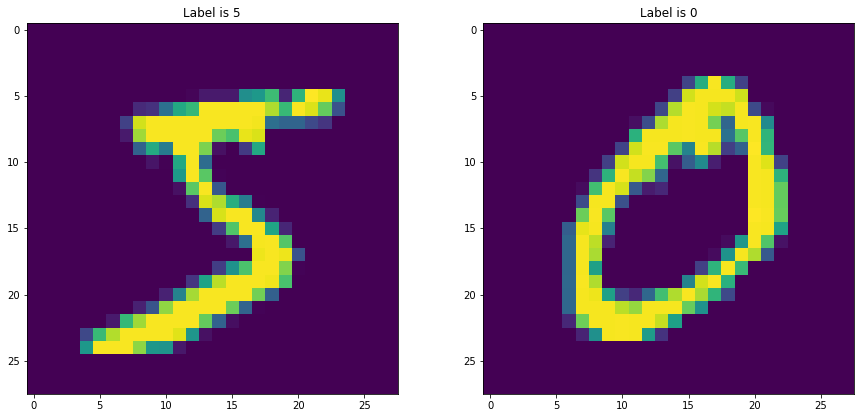

In [10]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [11]:
28*28

784

In [12]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
Tr_set.shape

(500, 784)

Good link: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
Difference: astype(int)

In [13]:
#L1 Norm accuracy is: 0.811
def predictL1(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [28]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
print(Test_images[0,:])
Labels_predicted=predictL1(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

In [15]:
#L2 Norm accuracy 0.8294

def predictL2(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.square(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [16]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predictL2(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))




Accuracy: 0.8294


In [31]:
#link: https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 
  

In [43]:
def predictK(X,k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(0,num_test):#for i in range(num_test):

        distances=np.sum(np.square(Tr_set-X[i,:]),axis=1)
        nbrs = []
        for j in range(k):
            min_index= np.argmin(distances)
            nbrs.append(Ltr_set[min_index])
            distances = np.delete(distances, min_index)
            #distances.delete(min_index)
          
        Lpred[i]=most_frequent(nbrs)
    return Lpred

In [46]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predictK(Test_images,3)

print("Accuracy:", np.mean(Labels_predicted==L_test))




Accuracy: 0.7937
